In [1]:
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "output" / "10_Artificial_Neural_Ntwk_w_Keras/extra_examples"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Saving figure", fig_id)

In [2]:
# to make this notebook's output stable across runs
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # silent warning for TF 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR 

import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [3]:
# setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Fake data (for demo)
# 1000 samples, 20 features
X = np.random.randn(1000, 20)
y = (np.sum(X, axis=1) > 0).astype(int)  # binary label

In [5]:
# Build the ANN
model = keras.Sequential([
    layers.Input(shape=(20,)),     # input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

In [6]:
# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train
history = model.fit(
    X, y,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7000 - loss: 0.6132 - val_accuracy: 0.7750 - val_loss: 0.5431
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8637 - loss: 0.4324 - val_accuracy: 0.9000 - val_loss: 0.3866
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9175 - loss: 0.3000 - val_accuracy: 0.9000 - val_loss: 0.2838
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9362 - loss: 0.2142 - val_accuracy: 0.9300 - val_loss: 0.2200
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9563 - loss: 0.1627 - val_accuracy: 0.9200 - val_loss: 0.1822
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.1292 - val_accuracy: 0.9350 - val_loss: 0.1614
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9750 - loss: 0.1060 - val_accuracy: 0.9350 - val_loss: 0.1466
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9800 - loss: 0.0878 - val_accuracy: 0.9450 - val_lo

In [8]:
# Evaluate
loss, acc = model.evaluate(X, y)
print("Accuracy:", acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0337
Accuracy: 0.9890000224113464


What’s Happening Internally (Very Important)

Each Dense layer:
𝑦=ReLU(𝑊𝑥+𝑏)

Training:
    Forward pass
    Binary cross-entropy loss
    Backpropagation
    Adam optimizer updates weights

In [9]:
# Prevent Overfitting (Real-World Version)
model = keras.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
# ANN → CNN (Images)
# Now let’s move to image data, where ANNs really shine.
# Load data -- CNN for MNIST (Handwritten Digits)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., None]  # add channel dimension
X_test = X_test[..., None]

In [11]:
# Build CNN
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile and Train
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9496 - loss: 0.1684 - val_accuracy: 0.9827 - val_loss: 0.0626
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9840 - loss: 0.0514 - val_accuracy: 0.9893 - val_loss: 0.0407
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9920 - loss: 0.0252 - val_accuracy: 0.9908 - val_loss: 0.0375
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9907 - val_loss: 0.0400


In [13]:
# Test
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0326


[0.03263580799102783, 0.9886999726295471]

In [14]:
# Regression Multilayer Perceptron (MLP)

# Build dataset using NumPy
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X_train = np.linspace(-10, 10, 1000)
y_train = np.sin(X_train) + np.random.normal(0, 0.2, size=X_train.shape)

X_test =  np.linspace(-10, 10, 500)
y_test =  np.sin(X_test) + np.random.normal(0, 0.2, size=X_test.shape)

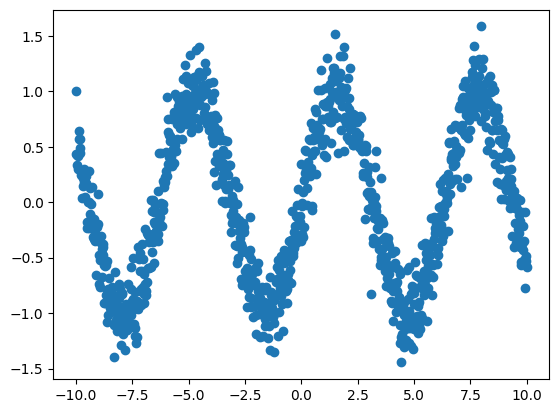

In [15]:
plt.scatter(X_train, y_train)
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers

# clear the session
keras.backend.clear_session()
# ---------------------------------------------------------
# 1. Generate synthetic regression data
# ---------------------------------------------------------
np.random.seed(42)

n_samples = 2000
X = np.random.uniform(-3, 3, size=(n_samples, 10))   # 10 features
y = (
    2*X[:, 0] 
    - 0.5*X[:, 1]**2 
    + 0.3*X[:, 2]*X[:, 3] 
    + np.sin(X[:, 4]) 
    + np.random.normal(0, 0.5, size=n_samples)
)

# ---------------------------------------------------------
# 2. Train/validation split
# ---------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# 3. Feature scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ---------------------------------------------------------
# 4. Build a clean Regression MLP (Keras 3.x)
# ---------------------------------------------------------
model = keras.Sequential([
    keras.Input(shape=(10,)),                 # 10 features
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)                           # linear output for regression
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12.7814 - mae: 2.9670 - val_loss: 7.9449 - val_mae: 2.2874
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5486 - mae: 1.6855 - val_loss: 3.0156 - val_mae: 1.4236
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4085 - mae: 1.2629 - val_loss: 2.4260 - val_mae: 1.2776
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8065 - mae: 1.0951 - val_loss: 1.8429 - val_mae: 1.1067
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3071 - mae: 0.9306 - val_loss: 1.2942 - val_mae: 0.9096
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9134 - mae: 0.7700 - val_loss: 0.9126 - val_mae: 0.7539
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6762 - mae: 0.6613 - val_loss: 0.7323 - val_mae: 0.6702
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5726 - mae: 0.6095 - val_loss: 0.6561 - val_mae: 0.6325
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5293 - mae:

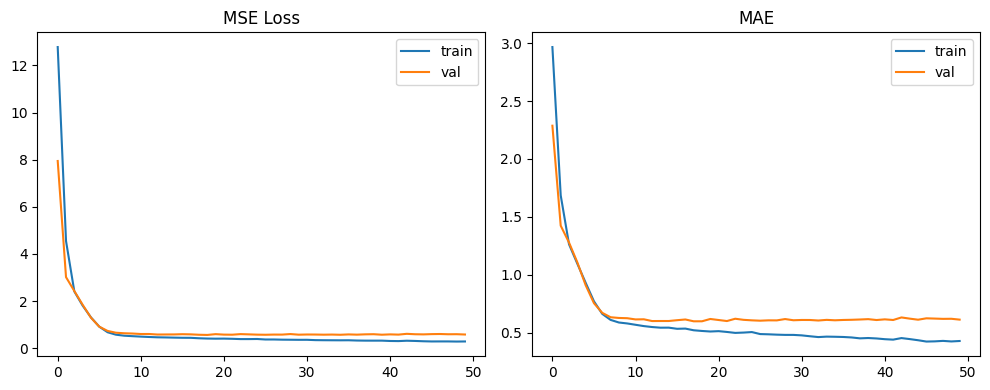

Validation MAE: 0.6118


In [17]:

# ---------------------------------------------------------
# 5. Train the model
# ---------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------------------------------------------
# 6. Plot learning curves
# ---------------------------------------------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("MSE Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="train")
plt.plot(history.history["val_mae"], label="val")
plt.title("MAE")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 7. Evaluate on validation set
# ---------------------------------------------------------
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MAE: {val_mae:.4f}")

In [18]:
# difference between keras.Input() and keras.layers.InputLayer()
from keras import Sequential, Input
from keras.layers import Dense

# clear the session to reset the name counters
keras.backend.clear_session()

model = Sequential([
    Input(shape=(10,)),          # symbolic input tensor
    Dense(64, activation="relu"),
    Dense(1)
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# clear the session to reset the name counters
keras.backend.clear_session()

from keras import Sequential
from keras.layers import InputLayer, Dense

model = Sequential([
    Input(shape=(10,)),   # actual layer object
    keras.layers.Flatten(),
    Dense(64, activation="relu"),
    Dense(1)
])

In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

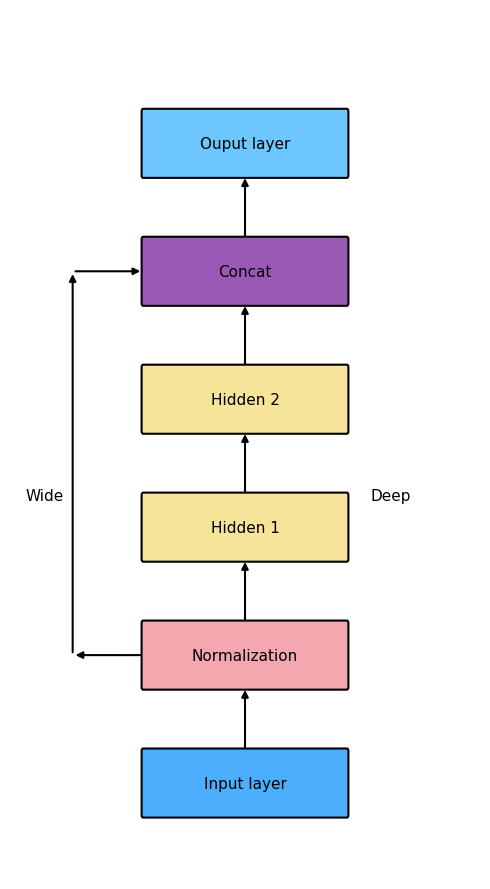

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

# helper function to draw rounded boxes
def draw_box(ax, x, y, w, h, text, color):
    box = FancyBboxPatch(
        (x, y), w, h,
        boxstyle = "round, pad = 0.02",
        linewidth = 1.5,
        edgecolor = "black",
        facecolor = color)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text, ha = "center", va = "center", fontsize = 11)

# helper function to draw arraws
def draw_arrow(ax, x1, y1, x2, y2):
    ax.annotate("",
                xy = (x2, y2),
                xytext = (x1, y1),
                arrowprops = dict(arrowstyle = "-|>", lw = 1.5, color = "black"))

fig, ax = plt.subplots(figsize = (5, 9))

# Box dimensions
w, h = 2.6, 0.5
x_center = 0

# Y positions
y_input = 0
y_norm = 1
y_h1 = 2
y_h2 = 3
y_concat = 4
y_out = 5

# Draw Boxes
draw_box(ax, x_center - w/2, y_input, w, h, "Input layer", "#4CAFFE")
draw_box(ax, x_center - w/2, y_norm, w, h, "Normalization", "#F4A7AF")
draw_box(ax, x_center - w/2, y_h1, w, h, "Hidden 1", "#F5E49A")
draw_box(ax, x_center - w/2, y_h2, w, h, "Hidden 2", "#F5E49A")
draw_box(ax, x_center - w/2, y_concat, w, h, "Concat", "#9B59B6")
draw_box(ax, x_center - w/2, y_out, w, h, "Ouput layer", "#6EC6FF")

# Vertical Arrows (deep path)
draw_arrow(ax, 0, y_input + h, 0, y_norm)
draw_arrow(ax, 0, y_norm + h, 0, y_h1)
draw_arrow(ax, 0, y_h1 + h, 0, y_h2)
draw_arrow(ax, 0, y_h2 + h, 0, y_concat)
draw_arrow(ax, 0, y_concat + h, 0, y_out)

# Wide skip connection (Normalization -> Concat)
x_wide = -2.2
draw_arrow(ax, x_center - w/2, y_norm + h/2, x_wide, y_norm + h/2)
draw_arrow(ax, x_wide, y_norm + h/2, x_wide, y_concat + h/2)
draw_arrow(ax, x_wide, y_concat + h/2, x_center - w/2, y_concat + h/2)

# Labels
ax.text(1.6, (y_h1+ y_h2)/2, "Deep", fontsize = 11, rotation = 0, va = "center")
ax.text(x_wide - 0.6, (y_norm+ y_concat)/2, "Wide", fontsize = 11, rotation = 0, va = "center")

# Formatting
ax.set_xlim(-3, 3)
ax.set_ylim(-0.5, 6.3)
ax.axis("off")

plt.tight_layout()
plt.show()

In [24]:
# every subclassed model follows the structure:
# Example 1. A dynamic model with conditional logic
import keras
from keras import layers

class DynamicModel(keras.Model):
    def __init__(self):
        super().__init__()    # define layers in __init__()
        self.dense1 = layers.Dense(64, activation="relu")
        self.dense2 = layers.Dense(64, activation="relu")
        self.out = layers.Dense(1)

    def call(self, x, training=None):
        x = self.dense1(x)             # define computation in call()

        # Dynamic behavior
        if keras.ops.mean(x) > 0:
            x = self.dense2(x)

        return self.out(x)

In [25]:
# Example 2 — A model with loops (e.g., custom RNN)
class LoopModel(keras.Model):
    def __init__(self, units):
        super().__init__()
        self.cell = layers.Dense(units, activation="tanh")

    def call(self, sequence):
        state = keras.ops.zeros((sequence.shape[0], self.cell.units))
        for t in range(sequence.shape[1]):
            state = self.cell(sequence[:, t] + state)
        return state

In [26]:
# Example 3 — A custom Layer for reuse
# Subclassing is also used for custom layers:
class ResidualBlock(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.d1 = layers.Dense(units, activation="relu")
        self.d2 = layers.Dense(units)

    def call(self, x):
        return x + self.d2(self.d1(x))


# Then you can plug it into any model:
class ResNetMLP(keras.Model):
    def __init__(self):
        super().__init__()
        self.block1 = ResidualBlock(64)
        self.block2 = ResidualBlock(64)
        self.out = layers.Dense(10)

    def call(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return self.out(x)



# Example 4 — A dynamic Vision Transformer block
# Since you’re exploring ViTs, here’s a subclassed Transformer block:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim):
        super().__init__()
        self.norm1 = layers.LayerNormalization()
        self.attn = layers.MultiHeadAttention(num_heads, key_dim=embed_dim)
        self.norm2 = layers.LayerNormalization()
        self.mlp = keras.Sequential([
            layers.Dense(mlp_dim, activation="gelu"),
            layers.Dense(embed_dim),
        ])

    def call(self, x):
        x = x + self.attn(self.norm1(x), self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x


In [7]:
import numpy as np

A = np.array([0, 0, 1, 1])
B = np.array([0, 1, 0, 1])

XOR = A ^ B   # numpy bitwise XOR

In [8]:
XOR

array([0, 1, 1, 0])